In [1]:
import os
import tensorflow as tf
#listdir returns a list containing the names of the entries in the directory given as a parameter
labels = os.listdir('archive') 

# tf.keras.preprocessing.text_dataset_from_directory Generates a 
# tf.data.Dataset from text files in a directory.
raw_data = tf.keras.preprocessing.text_dataset_from_directory(
    'archive',
    # "inferred" : the labels are generated from the directory structure
    labels = "inferred",
    # "int": the labels are encoded as integers
    label_mode = "int",
    # Maximum size of a text string. Texts longer than this will be shortened 
    # to max_length unless it's None ra7at explanation f kil zit.
    max_length = None,
    # Whether to shuffle the data. If False, sorts the data in alphanumeric order.
    shuffle=True,
    # Finally haja fahmetha mn bkri
    seed=11,
    # Optional float between 0 and 1, fraction of data to reserve for validation
    validation_split=None,
    # Only used if validation_split is set, mahich set alors sotit
    subset=None,
)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'archive'

In [ ]:
#print("Classes names:\n",raw_data.class_names)

In [ ]:
#type(raw_data)

In [ ]:
x=[]
y=[]
for text_batch, label_batch in raw_data:
    for i in range(len(text_batch)):
        s=text_batch.numpy()[i].decode("utf-8") 
        x.append(s)
        y.append(raw_data.class_names[label_batch.numpy()[i]])
print(len(x))
print(len(y))

45500
45500


In [ ]:
#x[:1] , y[:1]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

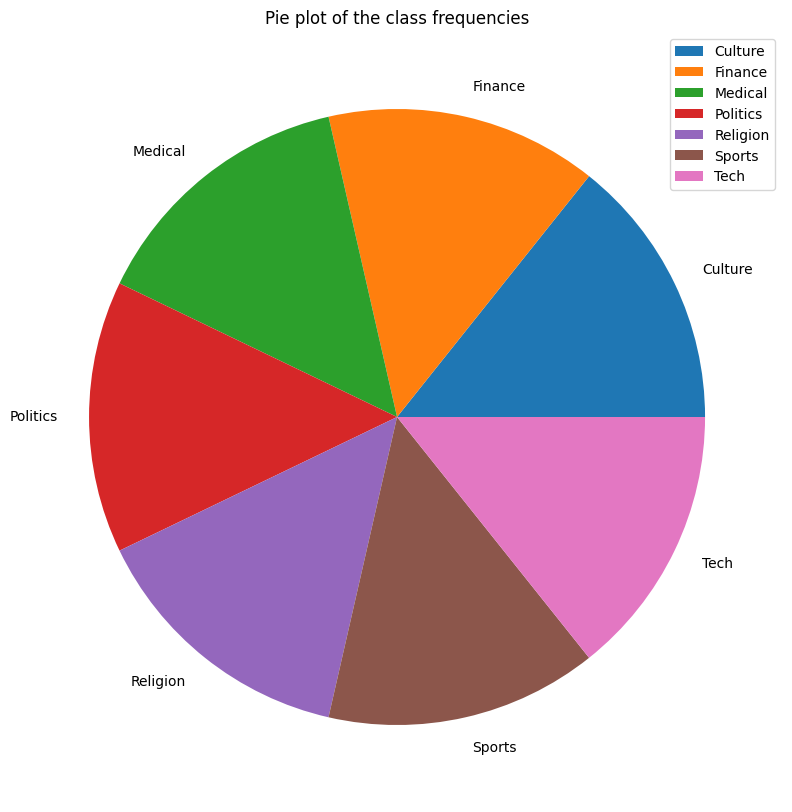

In [ ]:
unique, counts = np.unique(y, return_counts=True) #plt y 
plt.figure("classe Pie", figsize=(10, 10))
plt.title("Pie plot of the class frequencies")
plt.pie(counts, labels=labels)
plt.legend(unique)
plt.show();

In [ ]:
import pandas as pd 
data =pd.DataFrame({"text":x,"label":y})

In [ ]:
data.head()

,text,label
0,هل بات على البشرية أن تنشد المجد الأوروبي، وتب...,Culture
1,القاهرة: «الخليج» تضاربت الآراء بشأن رواية «مو...,Culture
2,يتمتع الفنان التشكيلي المغربي أحمد جاريد بمرجع...,Culture
3,أعلنت مجموعة اتصالات، إحدى شركات الاتصالات الر...,Tech
4,الشارقة - عايدة عبد الحميد: بحثت منطقة الشارقة...,Medical


In [ ]:
print('is null ? :  \n **************** ', data.isnull().sum())
print('data info : \n **************** ', data.info())
print('is duplicated : \n ************* ', data.duplicated().sum())
print('data shape \n :  ************** ', data.shape)

is null ? :  
 ****************  text     0
label    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45500 entries, 0 to 45499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    45500 non-null  object
 1   label   45500 non-null  object
dtypes: object(2)
memory usage: 711.1+ KB
data info : 
 ****************  None
is duplicated : 
 *************  15
data shape 
 :  **************  (45500, 2)


In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\youss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = list(set(stopwords.words('arabic')))
#print(stop_words)

In [ ]:
import re
import string
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

In [ ]:
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

In [ ]:
def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text

In [ ]:
stop_words = set(stopwords.words('arabic'))

def remove_diacritics(text):
    arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', str(text))
    return text

def remove_emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    text = remove_emoji(text)
    text = remove_diacritics(text)
    tokens = word_tokenize(text)
    text = ' '.join([word for word in tokens if word not in stop_words])
    return text

In [ ]:
import nltk
#from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
data['cleaned_text'] = data['text'].apply(clean_text)
#data.head()

After printing the result seems that for that code (copied from some kaggle notebook) to remove punctuation properly there should be a space between the word and the punct so a second fix

In [ ]:
List = []
for row in data.itertuples():
   List.append(re.sub(r'[\W\s]', ' ', row.text))

In [ ]:
data['attempt_million_cleaned'] = List

In [ ]:
#data.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['encodedLabel'] = label_encoder.fit_transform(data['label'])
data.head()

,text,label,cleaned_text,attempt_million_cleaned,encodedLabel
0,هل بات على البشرية أن تنشد المجد الأوروبي، وتب...,Culture,البشرية تنشد المجد الأوروبي، وتبحث ركن دافئ ظل...,هل بات على البشرية أن تنشد المجد الأوروبي وتب...,0
1,القاهرة: «الخليج» تضاربت الآراء بشأن رواية «مو...,Culture,القاهرة « الخليج » تضاربت الآراء بشأن رواية « ...,القاهرة الخليج تضاربت الآراء بشأن رواية مو...,0
2,يتمتع الفنان التشكيلي المغربي أحمد جاريد بمرجع...,Culture,يتمتع الفنان التشكيلي المغربي أحمد جاريد بمرجع...,يتمتع الفنان التشكيلي المغربي أحمد جاريد بمرجع...,0
3,أعلنت مجموعة اتصالات، إحدى شركات الاتصالات الر...,Tech,أعلنت مجموعة اتصالات، شركات الاتصالات الرائدة ...,أعلنت مجموعة اتصالات إحدى شركات الاتصالات الر...,6
4,الشارقة - عايدة عبد الحميد: بحثت منطقة الشارقة...,Medical,الشارقة عايدة عبد الحميد بحثت منطقة الشارقة ال...,الشارقة عايدة عبد الحميد بحثت منطقة الشارقة...,2


In [ ]:
data.to_csv(r'./textClassSecond_murtadha.csv', index = False)

In [ ]:
X_cla = data['attempt_million_cleaned'] 
y_cla = data['encodedLabel']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cla, y_cla, test_size=0.33, random_state=42)

#print('Training Data Shape:', X_train.shape)
#print('Testing Data Shape: ', X_test.shape)

In [ ]:
#y_test.value_counts()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) 
X_train_tfidf.shape

(30474, 353536)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])

text_clf.fit(X_train, y_train)  

predictions = text_clf.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,predictions))

0.9807474518686297


In [ ]:
print(raw_data.class_names)

['Culture', 'Finance', 'Medical', 'Politics', 'Religion', 'Sports', 'Tech']


In [ ]:
text_clf.predict([' العراق مهد الحضارات '])[0]
print(text_clf.predict([' العراق مهد الحضارات '])[0])


0


In [ ]:
text_clf.predict(['تلعب الرياضة دوراً مهماً في الحفاظ على المستوى الذِهني للأفراد بل وتحسينه خلال فترة التقدّم في العمر، بالإضافة إلى رفع مستوى التركيز '])[0]

5

In [ ]:
text_clf.predict([' عمل البنج الموضعي على تخدير الجزء الذي يتم وضعه عليه، حيث يقوم بمنع الأعصاب من إيصال إحساس الألم من المنطقة المصابة إلى الدماغ، ويتم استخدامه في العديد من الحالات الجراحية البسيطة، مثل جراحة الأسنان التقليدية '])[0]

2

In [ ]:
text_clf.predict(['وتقول السيدة إنها شاهدت الانفجارات وتبادل إطلاق النار بالبنادق، وتناثر الجثث في الشوارع، وتضيف: "إنه شيء لا يخطر على بال أحد" فضلا عن الرائحة الكريهة للسيارات المحترقة، إنها لوحة من الدمار لم يكن في حسبانها أنها ستشهد ذلك عندما سافرت لزيارة عائلتها.'])[0]

3

In [ ]:
text_clf.predict(["قال النائب عادل عبد الفضيل ، رئيس لجنة القوى العاملة بمجلس النواب، ورئيس النقابة العامة للعاملين بالمالية والضرائب والجمارك، إن الدولة المصرية تعاملت مع ملف الأزمة السودانية باقتدار وتعقل وتوازن، يؤكد نجاحها في إدارة الملف الخارجي بما يحفظ مكانة الدولة وقيمة المواطن المصرى بالداخل والخارج."])[0]

3

In [ ]:
text_clf.predict(['ويقام دور الـ32 لبطولة كأس مصر بمشاركة أندية الدورى الممتاز الممتاز 18 ناديا، بجانب 14 ناديا من الأقسام الأخرى وهى: "نادى شبان قنا، نادى لافيينا، بترول أسيوط، النجوم، المصرية للاتصالات، السكة الحديد، ألو ايجبت، منتخب السويس، الشرقية بالزقازيق، دكرنس، بروكسى، راية الرياضى، الحمام بمطروح، طلائع الأسطول'])[0]

5